In [1]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading and reading the data set
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4633,72289,Female,44.0,0,0,Yes,Private,Rural,68.42,43.2,smokes,0
646,62233,Female,70.0,0,0,No,Self-employed,Urban,98.42,36.4,formerly smoked,0
2681,5646,Female,2.0,0,0,No,children,Rural,92.30,14.8,Unknown,0
4830,50222,Female,22.0,0,0,No,Private,Rural,74.99,27.9,smokes,0
3797,41962,Female,32.0,0,0,Yes,Private,Rural,108.80,24.0,Unknown,0


In [3]:
# Finding the shape of data set in terms of rows and columns
data.shape

(5110, 12)

In [4]:
# Checking the null values in dataset
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

It is to be noted here that bmi values for 201 rows are missing.

In [5]:
# Calculating all the information about dataset, i.e. null values, data type, memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# EDA

In [6]:
# First we are going to impute the missing value in bmi column.
data['bmi'].fillna(data['bmi'].median(), inplace = True)

In [7]:
# Converting age column into integer data type
data['age'].astype(np.int32)

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int32

In [8]:
#  To check the unique values available and thier count in the column named hypertension.
data['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [9]:
#  To check the unique values available and thier count in the column named gender.
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Since the unique values in gender is apart from males and females and also it's just 1 so we are going to remove that row for better data analysis.

In [10]:
data = data[data['gender'] != 'Other']

In [11]:
data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [12]:
# To check the unique values available and thier count in the column named heart disease.
data['heart_disease'].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

In [13]:
#  To check the unique values available and thier count in the column named smoking status.
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [14]:
# To check the unique values available and thier count in the column named residence type.
data['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [15]:
#  To check the unique values available and thier count in the column named work type.
data['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

# Data visualization

In [16]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<Axes: xlabel='age', ylabel='stroke'>

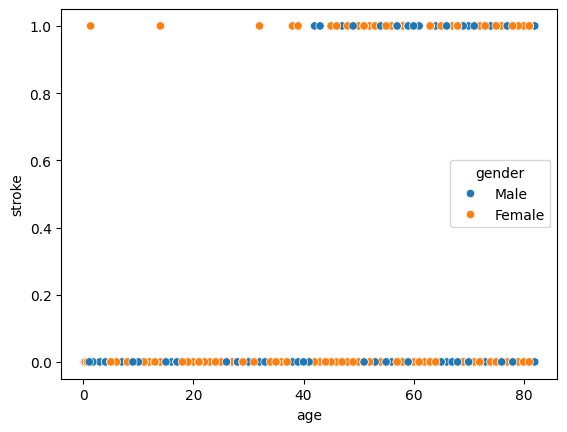

In [17]:
sns.scatterplot(data, x = 'age', y = 'stroke', hue = 'gender')

Females, in higher age, have more stroke than males comparatively.

<Axes: xlabel='age', ylabel='stroke'>

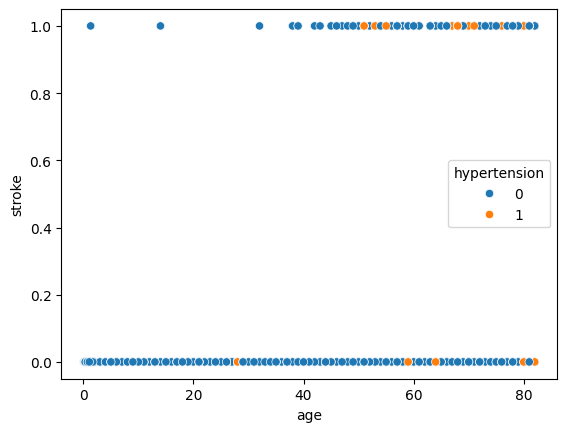

In [18]:
sns.scatterplot(data, x = 'age', y = 'stroke', hue = 'hypertension')

# Encoding categorical colums to numerical values.

In [19]:
data['gender'] = pd.get_dummies(data['gender'], drop_first=True) # drop_first=True is used so as to avoid dummy variable trap.

In [20]:
data['Residence_type'] = pd.get_dummies(data['Residence_type'], drop_first = True)

In [21]:
data['heart_disease'] = pd.get_dummies(data['heart_disease'], drop_first = True)

In [22]:
data['ever_married'] = pd.get_dummies(data['ever_married'], drop_first = True)

In [23]:
data['work_type'] = data.work_type.map({'Private' : 0, 'Self-employed' : 1, 'children' : 2, 'Govt_job' : 3, 'Never_worked' : 4})

In [24]:
data['smoking_status'] = data.smoking_status.map({'never smoked' : 0, 'Unknown' : 1, 'formerly smoked' : 2, 'smokes' : 3})

In [25]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,1,228.69,36.6,2,1
1,51676,0,61.0,0,0,1,1,0,202.21,28.1,0,1
2,31112,1,80.0,0,1,1,0,0,105.92,32.5,0,1
3,60182,0,49.0,0,0,1,0,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,1,0,174.12,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,0,1,83.75,28.1,0,0
5106,44873,0,81.0,0,0,1,1,1,125.20,40.0,0,0
5107,19723,0,35.0,0,0,1,1,0,82.99,30.6,0,0
5108,37544,1,51.0,0,0,1,0,0,166.29,25.6,2,0


Dropping id column since the analysis won't help in training and testing the dataset.

In [26]:
data = data.drop('id', axis = 1)

In [27]:
print(data)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          0   
1          0  61.0             0              0             1          1   
2          1  80.0             0              1             1          0   
3          0  49.0             0              0             1          0   
4          0  79.0             1              0             1          1   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          0   
5106       0  81.0             0              0             1          1   
5107       0  35.0             0              0             1          1   
5108       1  51.0             0              0             1          0   
5109       0  44.0             0              0             1          3   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0              

In [28]:
# converting required column types into categorical datatype
for i in data.columns:
  if (i == 'age' or i == 'avg_glucose_level' or i == 'bmi'):
    pass
  else:
    data[i] = data[i].astype('category')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5109 non-null   category
 1   age                5109 non-null   float64 
 2   hypertension       5109 non-null   category
 3   heart_disease      5109 non-null   category
 4   ever_married       5109 non-null   category
 5   work_type          5109 non-null   category
 6   Residence_type     5109 non-null   category
 7   avg_glucose_level  5109 non-null   float64 
 8   bmi                5109 non-null   float64 
 9   smoking_status     5109 non-null   category
 10  stroke             5109 non-null   category
dtypes: category(8), float64(3)
memory usage: 200.7 KB


Here we see that the memory consumption has decreased from 240 to 200 KB

# Splitting the data

In [30]:
# Splitting the data into X(independent columns) and y(dependent column)
from sklearn.model_selection import train_test_split
X = data[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
y = data['stroke']

In [31]:
# Splitting the data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [32]:
# Scaling the data using standard scaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Using SVM algorithm

In [33]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)

SVC()

In [34]:
# Predicting y values using SVM Algorithm.
y_pred = classifier.predict(X_test)

# Evaluation of the model

In [35]:
# Importing metrics to calculate accuracy, precision, recall, f1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [36]:
 # Calculating accuracy of y_values
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_knn*100) # calculating accuracy in percentage terms

Accuracy: 94.19439008480104


Since we are getting an accuracy of 94% we will use use hyperparameters to tune the values so that accuracy score is increased.

In [37]:
# Importing gridsearch cv to hypertune parameters.
from sklearn.model_selection import RandomizedSearchCV

In [38]:
# Hyperparametric tuning
estimator = SVC()
param_rand = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]}
rand_search = RandomizedSearchCV(estimator, param_rand, cv = 5, scoring = 'accuracy', n_jobs = -1)

In [39]:
# fitting the model for grid search
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['linear', 'rbf']},
                   scoring='accuracy')

In [40]:
print(rand_search.best_params_)

{'kernel': 'rbf', 'gamma': 1, 'C': 1}


In [42]:
# training with best hyperparameters as we got in previous result just above
better_svm = SVC(C = 1, kernel = 'rbf', gamma = 1)
better_svm.fit(X_train, y_train)
y_pred_svm = better_svm.predict(X_test) # Predicting model using SVM Algorithm.

In [43]:
accuracy_svm = accuracy_score(y_test,y_pred_svm)
print('Test accuracy:', accuracy_svm*100) # calculating accuracy

Test accuracy: 94.19439008480104


We do see here that our accuracy for the model has increased by  and it's  now.

In [44]:
# confusion matrix
con_mat_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", con_mat_svm)

Confusion Matrix:
 [[1444    0]
 [  89    0]]


In [45]:
# precision
prec_svm = con_mat_svm[0][0]*100/(con_mat_svm[0][0] + con_mat_svm[0][1])
print("Precision:", prec_svm)

Precision: 100.0


In [46]:
# recall
recall_svm = con_mat_svm[0][0]*100/(con_mat_svm[0][0] + con_mat_svm[1][0])
print('Recall:', recall_svm)

Recall: 94.19439008480104


In [47]:
# F-1 Score
f1_svm=2*prec_svm*recall_svm/(recall_svm + prec_svm)
print("F1 Score:", f1_svm)

F1 Score: 97.0104131676184


Conclusion: The model finally can predict 94.19% times the correct accuracy if the person will happen to have stroke on not. While 5.81% times the model is unable to predict. We have achieved a better precision with high accuracy thus model can be used for future aspirations. Although accuracy is higher, a more better hypertuning can further increase the accuracy.